In [1]:
# download and install the code

%%bash

git clone -b dev https://github.com/katherinekarababas/sodapop-em.git #download code repository from my GitHub account 
# can remove the -b dev option; just grabbing the dev branch for now because it's got some example data

mkdir /opt/bin /opt/lib/ /opt/lib/python3.7 /opt/lib/python3.7/site-packages #create install directory and make it findable
export PATH=$PATH:/opt/bin
export PYTHONPATH=$PYTHONPATH:/opt/lib/python3.7/site-packages

cd sodapop-em #install code
python3 setup.py install --prefix /opt/

python3 -m pip install emcee #install emcee package to handle markov-chain monte carlo sampling

echo -e '\n *** \n'

sample-pop-params -h #executable that draws samples in the population model's parameters

echo -e '\n *** \n'

infer-pop-params -h #executable that calculates the posterior probability of the sampled population parameters

echo -e '\n *** \n'

build-ppd -h #executable that postprocesses the population posterior samples to calculate the inferred mass distribution

echo -e '\n *** \n'

running install
running bdist_egg
running egg_info
creating sodapop.egg-info
writing sodapop.egg-info/PKG-INFO
writing dependency_links to sodapop.egg-info/dependency_links.txt
writing top-level names to sodapop.egg-info/top_level.txt
writing manifest file 'sodapop.egg-info/SOURCES.txt'
writing manifest file 'sodapop.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/sodapop
copying sodapop/priors.py -> build/lib/sodapop
copying sodapop/__init__.py -> build/lib/sodapop
copying sodapop/diagnostics.py -> build/lib/sodapop
copying sodapop/select.py -> build/lib/sodapop
copying sodapop/populations.py -> build/lib/sodapop
copying sodapop/emcee.py -> build/lib/sodapop
copying sodapop/parameters.py -> build/lib/sodapop
creating build/bdist.linux-x86_64
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/sodapop
copying build/lib/sodapop/priors.py -> buil

Cloning into 'sodapop-em'...
zip_safe flag not set; analyzing archive contents...


In [ ]:
# run this cell to pull updates without re-downloading the whole repo

%%bash

cd sodapop-em
git pull 
python3 setup.py install --prefix /opt/

In [13]:
# import packages

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [45]:
# load population parameter posterior samples

dns_path = 'sodapop-em/dat/dns/peakcut_mass.csv' # modify paths as needed to point to results
gw_path = 'sodapop-em/dat/gw/peakcut_mass.csv'
joint_path = 'sodapop-em/dat/gw+dns/peakcut_mass.csv'

dns_data = np.genfromtxt(dns_path,delimiter=',',names=True,dtype=None) # read csv files
gw_data = np.genfromtxt(gw_path,delimiter=',',names=True,dtype=None)
joint_data = np.genfromtxt(joint_path,delimiter=',',names=True,dtype=None)

dns = pd.DataFrame(dns_data) # store each dataset as a pandas dataframe, then combine into one big dataframe
gw = pd.DataFrame(gw_data)
joint = pd.DataFrame(joint_data)
data = pd.concat({'dns': dns, 'gw': gw, 'joint': joint},names='C').reset_index()

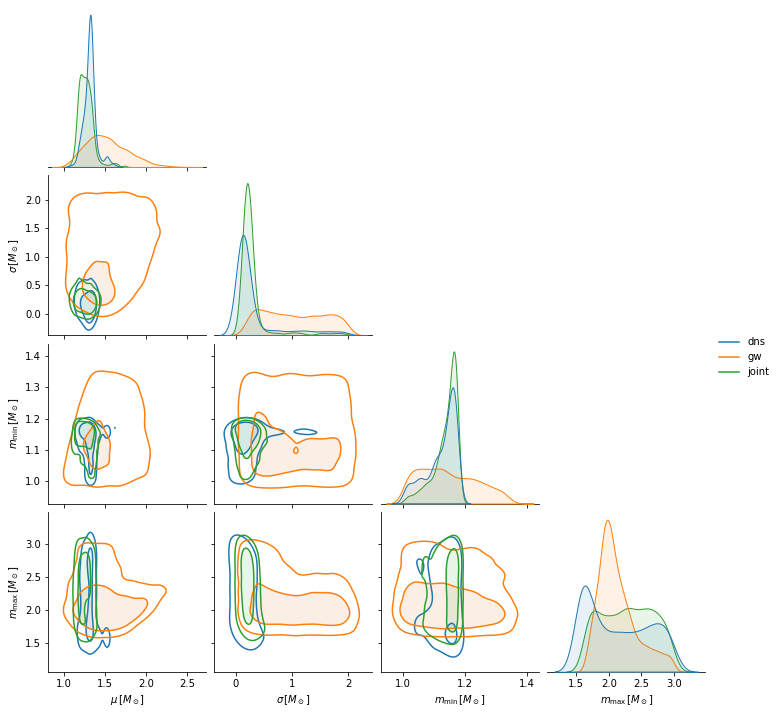

In [53]:
# seaborn's pairplot is the easiest way to make corner plots; see the docs at https://seaborn.pydata.org/generated/seaborn.pairplot.html

cols = ['mu','sigma','mmin','mmax'] # which columns to plot
replacements = {'mmin': r'$m_\mathrm{min} \,[M_\odot]$', 'mmax': r'$m_\mathrm{max} \,[M_\odot]$', 'mu': r'$\mu \,[M_\odot]$', 'sigma': r'$\sigma \,[M_\odot]$'} # dictionary mapping column names to axis labels
#limits = {'mmin': (0.8,1.8), 'mmax': (1.8,2.8), 'mu': (0.8,2.8), 'sigma': (0.,2.)} # dictionary mapping column names to plot ranges

fig = sns.pairplot(data,hue='C',vars=cols,kind='kde',diag_kind='kde',corner=True,plot_kws={'levels':[0.1,0.5]},diag_kws={'common_norm':False,'alpha':0.1})
fig.map_lower(sns.kdeplot, data=data, hue='C', levels=[0.5,1.], fill=True, alpha=0.1) # this just fills the inner contours

for i in range(len(vars)):
    for j in range(i+1):
        xlabel = vars[j]
        ylabel = vars[i]
        if xlabel in replacements.keys():
            fig.axes[i][j].set_xlabel(replacements[xlabel])
            #fig.axes[i][j].set_xlim(*limits[xlabel]) # manually control plot ranges
        if ylabel in replacements.keys():
            fig.axes[i][j].set_ylabel(replacements[ylabel])
            #fig.axes[i][j].set_ylim(*limits[ylabel])

fig._legend.set_title('')
plt.show()